<a href="https://colab.research.google.com/github/tylee33/DLforFinance/blob/master/Monte_Carlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
    name = fn, length = len(uploaded[fn])))

Saving stocks.csv to stocks.csv
User uploaded file "stocks.csv" with length 61230 bytes


# **금융상품들의 포트폴리오 평가**
**몬테카를로 시뮬레이션 금융에 적용하기**

평균수익
주가변동성 (std)
Sharpe ratio

# **Data Loading**

pandas datareader

In [6]:
# 저장된 CSV 파일을 사용한다

import pandas as pd
prices = pd.read_csv('stocks.csv')
prices = prices.set_index('Date')
prices.head(3)
prices.index = pd.DatetimeIndex(prices.index)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1419 entries, 2013-01-02 to NaT
Data columns (total 4 columns):
KOSPI      1337 non-null float64
SP         1337 non-null float64
MSCI_EM    1337 non-null float64
MSCI_WI    1337 non-null float64
dtypes: float64(4)
memory usage: 55.4 KB


# **임의의 확률에 근거한 포트폴리오 수익률 계산**

Portfolio Rate

In [0]:
import pandas as pd
import numpy as np

In [8]:
portfolio_rate     = [0.5, 0.2, 0.2, 0.1]
portfolio_rate

[0.5, 0.2, 0.2, 0.1]

In [9]:
returns            = prices.pct_change()
returns.head(4)

,KOSPI,SP,MSCI_EM,MSCI_WI
Date,,,,
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.005756,-0.002086,0.004192,-0.002192
2013-01-04,-0.003699,0.004865,-0.004422,0.004195
2013-01-07,-0.000343,-0.003123,-0.001978,-0.002338


In [10]:
cov_returns        = returns.cov()
cov_returns

,KOSPI,SP,MSCI_EM,MSCI_WI
KOSPI,0.000050,2.140566e-06,-0.000004,-3.295739e-06
SP,0.000002,5.761824e-05,0.000001,-2.457716e-07
MSCI_EM,-0.000004,1.488472e-06,0.000069,3.364095e-05
MSCI_WI,-0.000003,-2.457716e-07,0.000034,4.107121e-05


In [11]:
mean_daily_returns = returns.mean()
mean_daily_returns

KOSPI      0.000163
SP         0.000444
MSCI_EM    0.000112
MSCI_WI    0.000334
dtype: float64

In [12]:
weights            = np.asarray(portfolio_rate)
weights 

array([0.5, 0.2, 0.2, 0.1])

In [13]:
portfolio_return   = round(np.sum(
    mean_daily_returns * weights) * 252, 2)   
portfolio_return

0.06

In [14]:
portfolio_std_dev  = round(np.sqrt(
    np.dot(weights.T, 
           np.dot(cov_returns, weights)) ) * np.sqrt(252), 2) 
portfolio_std_dev

0.07

In [15]:
print(' 분산비율 : {} \n1) 연간 수익 : +- {} \n2) 변동률 : {}'.format(
    portfolio_rate, portfolio_return, portfolio_std_dev))

 분산비율 : [0.5, 0.2, 0.2, 0.1] 
1) 연간 수익 : +- 0.06 
2) 변동률 : 0.07


# **몬테카를로 시뮬레이션을 활용한 포트폴리오 평가**

In [0]:
returns            = prices.pct_change()
cov_returns        = returns.cov()      
mean_daily_returns = returns.mean()
num_portfolios     = 25000   

In [17]:
results            = np.zeros((3 + len(prices.columns), num_portfolios))
results

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
weights  = np.random.random(len(prices.columns))
weights

array([0.6362392 , 0.57200257, 0.34816079, 0.82766411])

In [19]:
for i in range(num_portfolios):
    weights  = np.random.random(len(prices.columns))
    weights /= np.sum(weights)             
    
    portfolio_return  = np.sum(
        mean_daily_returns * weights) * 252       

    portfolio_std_dev = np.sqrt(              
        np.dot(weights.T, np.dot(cov_returns, weights))) * np.sqrt(252)   

    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i]/results[1,i]

    for j in range(len(weights)):           
        results[j+3, i] = weights[j]           
    
results_frame = pd.DataFrame(results.T, 
                             columns = ['ret','stdev','sharpe', 
                                        prices.columns[0], 
                                        prices.columns[1], 
                                        prices.columns[2], 
                                        prices.columns[3]])
results_frame.head()

,ret,stdev,sharpe,KOSPI,SP,MSCI_EM,MSCI_WI
0,0.075460,0.065471,1.152583,0.322651,0.378031,0.094219,0.205099
1,0.072935,0.072807,1.001761,0.203696,0.101630,0.093035,0.601639
2,0.067838,0.064644,1.049401,0.445574,0.203694,0.049266,0.301467
3,0.071018,0.067240,1.056175,0.365275,0.376656,0.140298,0.117771
4,0.075413,0.073796,1.021912,0.300513,0.497098,0.171441,0.030948


In [20]:
results_frame.shape

(25000, 7)

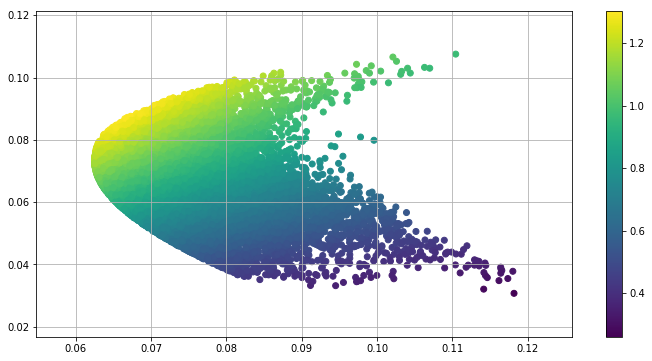

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(results_frame.stdev, 
            results_frame.ret,  
            c = results_frame.sharpe)
plt.grid(); plt.colorbar()

# **몬테카를로 포트폴리오 최적값 계산**

*   샤프지수 최대인 포트폴리오
*   표준편차 최소인 포트폴리오



In [22]:
results_frame.head()

,ret,stdev,sharpe,KOSPI,SP,MSCI_EM,MSCI_WI
0,0.075460,0.065471,1.152583,0.322651,0.378031,0.094219,0.205099
1,0.072935,0.072807,1.001761,0.203696,0.101630,0.093035,0.601639
2,0.067838,0.064644,1.049401,0.445574,0.203694,0.049266,0.301467
3,0.071018,0.067240,1.056175,0.365275,0.376656,0.140298,0.117771
4,0.075413,0.073796,1.021912,0.300513,0.497098,0.171441,0.030948


In [23]:
results_frame['sharpe'].idxmax()

6558

In [24]:
results_frame.iloc[results_frame['sharpe'].idxmax() , :]

ret        0.087220
stdev      0.066843
sharpe     1.304844
KOSPI      0.176923
SP         0.389204
MSCI_EM    0.001290
MSCI_WI    0.432583
Name: 6558, dtype: float64

In [25]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
min_vol_port    = results_frame.iloc[results_frame['stdev'].idxmin()] 
min_vol_port  

ret        0.073899
stdev      0.062504
sharpe     1.182302
KOSPI      0.325262
SP         0.253117
MSCI_EM    0.057880
MSCI_WI    0.363741
Name: 22317, dtype: float64

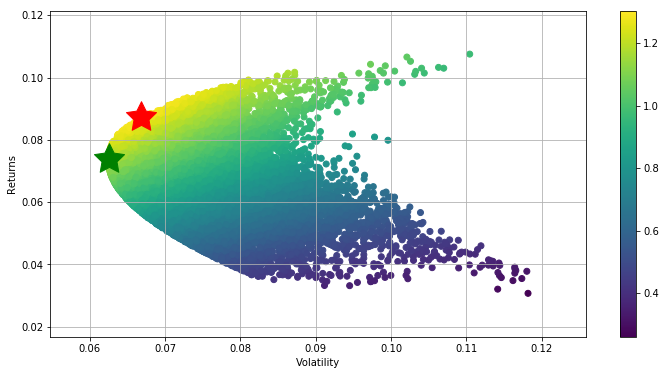

In [26]:
plt.figure(figsize=(12,6)); plt.grid()
plt.scatter(results_frame.stdev, 
            results_frame.ret,
            c = results_frame.sharpe)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

plt.scatter(max_sharpe_port[1], max_sharpe_port[0],
            marker = (5,1,0), color = 'r', s = 1000)

plt.scatter(min_vol_port[1],  min_vol_port[0],
            marker = (5,1,0), color = 'g', s = 1000)

In [27]:
print(max_sharpe_port)

ret        0.087220
stdev      0.066843
sharpe     1.304844
KOSPI      0.176923
SP         0.389204
MSCI_EM    0.001290
MSCI_WI    0.432583
Name: 6558, dtype: float64


In [28]:
print(min_vol_port)

ret        0.073899
stdev      0.062504
sharpe     1.182302
KOSPI      0.325262
SP         0.253117
MSCI_EM    0.057880
MSCI_WI    0.363741
Name: 22317, dtype: float64
